# **Homework 7 - Text and Sentiment Analysis**

### **1. Refer to the state of the union addresses made by US presidents since WWII. To simplify the task, only looks at the first address for each president.**

Loading all necessary libraries

In [388]:
import requests # allows to download things from online without downloading to our computer
from bs4 import BeautifulSoup # package to work with HTML context and work with tag
import nltk # package for work with natural languages; natural language processing
from collections import Counter # counts words
import pandas as pd 

In [389]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loizoskon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [390]:
import re

In [391]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [392]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import LatentDirichletAllocation as LDA

In [393]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

In [394]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import contractions
import wordninja

from autocorrect import Speller

In [395]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/loizoskon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [396]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/loizoskon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [397]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/loizoskon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [398]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [399]:
import matplotlib.pyplot as plt

In [400]:
from nltk.tokenize import word_tokenize

In [401]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/loizoskon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [402]:
from scipy.cluster.vq import kmeans, vq

In [403]:
import pickle

In [404]:
# Load the Porter stemming function from the nltk package
from nltk.stem import PorterStemmer

In [405]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

In [406]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

In [407]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [408]:
# Load the library allowing similarity computations
from gensim import similarities

In [409]:
# Import the needed functions from matplotlib
import matplotlib.pyplot as plt

In [410]:
# Import library for dendogram
from scipy.cluster import hierarchy

In [411]:
# Import all we need from sklearn
from sklearn.model_selection import train_test_split

In [412]:
from sklearn import metrics

In [413]:
from sklearn.svm import LinearSVC

In [414]:
from sklearn.naive_bayes import MultinomialNB

### **2. What are the 10 most common "meaningful" words used by each president since Harry Truman? What does it say about the shift in priorities in the American politics?**

**President 1 | Harry S Truman | 1947 | Democrat**

Importing the dataset and printing first 2000 characters 

In [415]:
r = requests.get("https://www.presidency.ucsb.edu/documents/annual-message-the-congress-the-state-the-union-15")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

Extracting useful data that is readable

In [416]:
soup = BeautifulSoup(html, "html.parser")
truman_text = soup.get_text()
print(truman_text[0:2000])











Annual Message to the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1201)
Written Mes

The document needs to be tokenized in order for it to be analyzed. Therefore, splitting the text into individual words. 

In [417]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(truman_text) 
print(tokens[0:10])

['Annual', 'Message', 'to', 'the', 'Congress', 'on', 'the', 'State', 'of', 'the']


Some additional pre-processing is needed. Converting the words to lowercase. 

In [418]:
truman_words = [token.lower() for token in tokens] 
print(truman_words[0:10])

['annual', 'message', 'to', 'the', 'congress', 'on', 'the', 'state', 'of', 'the']


Defining stopwords and adding more to the list. This list is same across all 14 presidents' speeches. 

In [419]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [420]:
words_ns = [word for word in truman_words if word not in sw] 
print(words_ns[:20])
truman_ns = " ".join(words_ns)

['presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620', 'remarks', '23724']


Determining the most common words

In [421]:
count = Counter(words_ns)
top_ten_truman = count.most_common(10)
print(top_ten_truman)

[('labor', 30), ('war', 22), ('management', 19), ('housing', 16), ('public', 14), ('peace', 13), ('economic', 13), ('commission', 13), ('veterans', 13), ('economy', 11)]


Repeating the same steps for all the other 13 presidents after Harry Truman 

**President 2 | Dwight D Eisenhower | 1953 | Republican**

In [422]:
r = requests.get("https://www.presidency.ucsb.edu/documents/annual-message-the-congress-the-state-the-union-16")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [423]:
soup = BeautifulSoup(html, "html.parser")
eisenhower_text = soup.get_text()
print(eisenhower_text[0:2000])











Annual Message to the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1201)
Written Mes

In [424]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(eisenhower_text) 
print(tokens[0:10])

['Annual', 'Message', 'to', 'the', 'Congress', 'on', 'the', 'State', 'of', 'the']


In [425]:
eisenhower_words = [token.lower() for token in tokens] 
print(eisenhower_words[0:10])

['annual', 'message', 'to', 'the', 'congress', 'on', 'the', 'state', 'of', 'the']


In [426]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [427]:
words_ns = [word for word in eisenhower_words if word not in sw] 
print(words_ns[:20])
eisenhower_ns = " ".join(words_ns)

['presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620', 'remarks', '23724']


In [428]:
count = Counter(words_ns)
top_ten_eisenhower = count.most_common(10)
print(top_ten_eisenhower)

[('security', 21), ('labor', 21), ('federal', 21), ('economic', 20), ('freedom', 17), ('defense', 16), ('strength', 14), ('action', 12), ('military', 12), ('clear', 11)]


**President 3 | John F Kennedy | 1961 | Democrat**

In [429]:
r = requests.get("https://www.presidency.ucsb.edu/documents/annual-message-the-congress-the-state-the-union-5")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [430]:
soup = BeautifulSoup(html, "html.parser")
kennedy_text = soup.get_text()
print(kennedy_text[0:2000])











Annual Message to the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1201)
Written Mes

In [431]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(kennedy_text) 
print(tokens[0:10])

['Annual', 'Message', 'to', 'the', 'Congress', 'on', 'the', 'State', 'of', 'the']


In [432]:
kennedy_words = [token.lower() for token in tokens] 
print(kennedy_words[0:10])

['annual', 'message', 'to', 'the', 'congress', 'on', 'the', 'state', 'of', 'the']


In [433]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [434]:
words_ns = [word for word in kennedy_words if word not in sw] 
print(words_ns[:20])
kennedy_ns = " ".join(words_ns)

['presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620', 'remarks', '23724']


In [435]:
count = Counter(words_ns)
top_ten_kennedy = count.most_common(10)
print(top_ten_kennedy)

[('economic', 16), ('development', 10), ('peace', 10), ('free', 9), ('economy', 9), ('foreign', 9), ('public', 9), ('problems', 8), ('never', 8), ('increase', 8)]


**President 4 | Lyndon B Johnson | 1965 | Democrat**

In [436]:
r = requests.get("https://www.presidency.ucsb.edu/documents/annual-message-the-congress-the-state-the-union-26")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [437]:
soup = BeautifulSoup(html, "html.parser")
johnson_text = soup.get_text()
print(johnson_text[0:2000])











Annual Message to the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1201)
Written Mes

In [438]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(johnson_text) 
print(tokens[0:10])

['Annual', 'Message', 'to', 'the', 'Congress', 'on', 'the', 'State', 'of', 'the']


In [439]:
johnson_words = [token.lower() for token in tokens] 
print(johnson_words[0:10])

['annual', 'message', 'to', 'the', 'congress', 'on', 'the', 'state', 'of', 'the']


In [440]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [441]:
words_ns = [word for word in johnson_words if word not in sw] 
print(words_ns[:20])
johnson_ns = " ".join(words_ns)

['presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620', 'remarks', '23724']


In [442]:
count = Counter(words_ns)
top_ten_johnson = count.most_common(10)
print(top_ten_johnson)

[('freedom', 12), ('life', 9), ('progress', 8), ('right', 7), ('community', 7), ('free', 7), ('growing', 7), ('open', 7), ('economy', 7), ('together', 6)]


**President 5 | Richard Nixon | 1970 | Republican**

In [443]:
r = requests.get("https://www.presidency.ucsb.edu/documents/annual-message-the-congress-the-state-the-union-2")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [444]:
soup = BeautifulSoup(html, "html.parser")
nixon_text = soup.get_text()
print(nixon_text[0:2000])











Annual Message to the Congress on the State of the Union. | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1201)
Written Me

In [445]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(nixon_text) 
print(tokens[0:10])

['Annual', 'Message', 'to', 'the', 'Congress', 'on', 'the', 'State', 'of', 'the']


In [446]:
nixon_words = [token.lower() for token in tokens] 
print(nixon_words[0:10])

['annual', 'message', 'to', 'the', 'congress', 'on', 'the', 'state', 'of', 'the']


In [447]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [448]:
words_ns = [word for word in nixon_words if word not in sw] 
print(words_ns[:20])
nixon_ns = " ".join(words_ns)

['presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620', 'remarks', '23724']


In [449]:
count = Counter(words_ns)
top_ten_nixon = count.most_common(10)
print(top_ten_nixon)

[('peace', 16), ('war', 15), ('growth', 11), ('land', 10), ('responsibility', 9), ('life', 9), ('crime', 9), ('federal', 9), ('clean', 9), ('air', 8)]


**President 6 | Gerald R Ford | 1975 | Republican**

In [450]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-reporting-the-state-the-union-1")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [451]:
soup = BeautifulSoup(html, "html.parser")
ford_text = soup.get_text()
print(ford_text[0:2000])











Address Before a Joint Session of the Congress Reporting on the State of the Union. | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663

In [452]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(ford_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'Reporting', 'on']


In [453]:
ford_words = [token.lower() for token in tokens] 
print(ford_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'reporting', 'on']


In [454]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [455]:
words_ns = [word for word in ford_words if word not in sw] 
print(words_ns[:20])
ford_ns = " ".join(words_ns)

['joint', 'session', 'reporting', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters']


In [456]:
count = Counter(words_ns)
top_ten_ford = count.most_common(10)
print(top_ten_ford)

[('energy', 25), ('oil', 20), ('federal', 17), ('tax', 17), ('economic', 12), ('billion', 11), ('taxes', 10), ('income', 9), ('cut', 9), ('spending', 9)]


**President 7 | Jimmy Carter | 1978 | Democrat**

In [457]:
r = requests.get("https://www.presidency.ucsb.edu/documents/the-state-the-union-address-delivered-before-joint-session-the-congress-1")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [458]:
soup = BeautifulSoup(html, "html.parser")
carter_text = soup.get_text()
print(carter_text[0:2000])











The State of the Union Address Delivered Before a Joint Session of the Congress.  | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)


In [459]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(carter_text) 
print(tokens[0:10])

['The', 'State', 'of', 'the', 'Union', 'Address', 'Delivered', 'Before', 'a', 'Joint']


In [460]:
carter_words = [token.lower() for token in tokens] 
print(carter_words[0:10])

['the', 'state', 'of', 'the', 'union', 'address', 'delivered', 'before', 'a', 'joint']


In [461]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [462]:
words_ns = [word for word in carter_words if word not in sw] 
print(words_ns[:20])
carter_ns = " ".join(words_ns)

['joint', 'session', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620']


In [463]:
count = Counter(words_ns)
top_ten_carter = count.most_common(10)
print(top_ten_carter)

[('inflation', 17), ('economic', 14), ('tax', 13), ('together', 11), ('economy', 11), ('foreign', 11), ('security', 11), ('energy', 10), ('work', 10), ('jobs', 10)]


**President 8 | Ronald Reagen | 1982 | Republican**

In [464]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-reporting-the-state-the-union-2")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [465]:
soup = BeautifulSoup(html, "html.parser")
reagan_text = soup.get_text()
print(reagan_text[0:2000])











Address Before a Joint Session of the Congress Reporting on the State of the Union  | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663

In [466]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(reagan_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'Reporting', 'on']


In [467]:
reagan_words = [token.lower() for token in tokens] 
print(reagan_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'reporting', 'on']


In [468]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [469]:
words_ns = [word for word in reagan_words if word not in sw] 
print(words_ns[:20])
reagan_ns = " ".join(words_ns)

['joint', 'session', 'reporting', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters']


In [470]:
count = Counter(words_ns)
top_ten_reagan = count.most_common(10)
print(top_ten_reagan)

[('federal', 23), ('tax', 16), ('together', 15), ('billion', 14), ('last', 13), ('made', 11), ('economic', 11), ('spending', 11), ('inflation', 10), ('growth', 10)]


**President 9 | George Bush | 1990 | Republican**

In [471]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-2")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [472]:
soup = BeautifulSoup(html, "html.parser")
bush_text = soup.get_text()
print(bush_text[0:2000])











Address Before a Joint Session of the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1

In [473]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(bush_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'on', 'the']


In [474]:
bush_words = [token.lower() for token in tokens] 
print(bush_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'on', 'the']


In [475]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [476]:
words_ns = [word for word in bush_words if word not in sw] 
print(words_ns[:20])
bush_ns = " ".join(words_ns)

['joint', 'session', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620']


In [477]:
count = Counter(words_ns)
top_ten_bush = count.most_common(10)
print(top_ten_bush)

[('free', 13), ('freedom', 11), ('idea', 10), ('kids', 9), ('hope', 9), ('budget', 8), ('home', 8), ('capital', 8), ('change', 8), ('europe', 8)]


**President 10 | William J Clinton | 1994 | Democrat**

In [478]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-12")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [479]:
soup = BeautifulSoup(html, "html.parser")
clinton_text = soup.get_text()
print(clinton_text[0:2000])











Address Before a Joint Session of the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1

In [480]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(clinton_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'on', 'the']


In [481]:
clinton_words = [token.lower() for token in tokens] 
print(clinton_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'on', 'the']


In [482]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [483]:
words_ns = [word for word in clinton_words if word not in sw] 
print(words_ns[:20])
clinton_ns = " ".join(words_ns)

['joint', 'session', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620']


In [484]:
count = Counter(words_ns)
top_ten_clinton = count.most_common(10)
print(top_ten_clinton)

[('health', 41), ('care', 40), ('work', 34), ('welfare', 21), ('jobs', 20), ('children', 16), ('crime', 16), ('insurance', 16), ('reform', 14), ('cut', 12)]


**President 11 | George W Bush | 2002 | Republican**

In [485]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-22")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [486]:
soup = BeautifulSoup(html, "html.parser")
wbush_text = soup.get_text()
print(wbush_text[0:2000])











Address Before a Joint Session of the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1

In [487]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(wbush_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'on', 'the']


In [488]:
wbush_words = [token.lower() for token in tokens] 
print(wbush_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'on', 'the']


In [489]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [490]:
words_ns = [word for word in wbush_words if word not in sw] 
print(words_ns[:20])
wbush_ns = " ".join(words_ns)

['joint', 'session', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620']


In [491]:
count = Counter(words_ns)
top_ten_wbush = count.most_common(10)
print(top_ten_wbush)

[('security', 19), ('freedom', 15), ('afghanistan', 13), ('terror', 13), ('war', 12), ('terrorist', 12), ('weapons', 12), ('jobs', 11), ('terrorists', 10), ('camps', 8)]


**President 12 | Barack Obama | 2010 | Democrat**

In [492]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-17")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [493]:
soup = BeautifulSoup(html, "html.parser")
obama_text = soup.get_text()
print(obama_text[0:2000])











Address Before a Joint Session of the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1

In [494]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(obama_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'on', 'the']


In [495]:
obama_words = [token.lower() for token in tokens] 
print(obama_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'on', 'the']


In [496]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [497]:
words_ns = [word for word in obama_words if word not in sw] 
print(words_ns[:20])
obama_ns = " ".join(words_ns)

['joint', 'session', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620']


In [498]:
count = Counter(words_ns)
top_ten_obama = count.most_common(10)
print(top_ten_obama)

[('jobs', 23), ('work', 21), ('businesses', 18), ('right', 18), ('families', 17), ('last', 16), ('economy', 15), ('small', 15), ('energy', 15), ('even', 14)]


**President 13 | Donald J Trump | 2018 | Republican**

In [499]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-25")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [500]:
soup = BeautifulSoup(html, "html.parser")
trump_text = soup.get_text()
print(trump_text[0:2000])











Address Before a Joint Session of the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1

In [501]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(trump_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'on', 'the']


In [502]:
trump_words = [token.lower() for token in tokens] 
print(trump_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'on', 'the']


In [503]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [504]:
words_ns = [word for word in trump_words if word not in sw] 
print(words_ns[:20])
trump_ns = " ".join(words_ns)

['joint', 'session', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620']


In [505]:
count = Counter(words_ns)
top_ten_trump = count.most_common(10)
print(top_ten_trump)

[('tax', 15), ('last', 13), ('together', 13), ('work', 12), ('home', 12), ('always', 10), ('family', 10), ('could', 8), ('never', 8), ('love', 8)]


**President 14 | Joseph R Biden | 2022 | Democrat**

In [506]:
r = requests.get("https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-28")
r.encoding = 'utf-8' 
html = r.text 
print(html[0:2000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_requir

In [507]:
soup = BeautifulSoup(html, "html.parser")
biden_text = soup.get_text()
print(biden_text[0:2000])











Address Before a Joint Session of the Congress on the State of the Union | The American Presidency Project
























Skip to main content

 




The American Presidency Project


About Search










Toggle navigation







Documents Guidebook
Category Attributes

Statistics
Media Archive
Presidents
Analyses
GIVE
 










Documents

Archive Guidebook
Categories
Attributes



Categories

Presidential (227045) Correspondents' Association (32)
Eulogies (62)
Executive Orders (6283)
Fireside Chats (27)
Interviews (958)
Letters (4620)
Miscellaneous Remarks (23724)
Miscellaneous Written (842)
News Conferences (2481)
Signing Statements (2145)
Spoken Addresses and Remarks (18589)
Farewell Address (11)
Inaugural Addresses (62)
Memoranda (3121)
Messages (11338)
Oral Address (631)
Proclamations (8715)
Saturday Weekly Addresses (Radio and Webcast) (1639)
State Dinners (953)
State of the Union Addresses (98)
State of the Union Messages (140)
Statements (13663)
Vetoes (1

In [508]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(biden_text) 
print(tokens[0:10])

['Address', 'Before', 'a', 'Joint', 'Session', 'of', 'the', 'Congress', 'on', 'the']


In [509]:
biden_words = [token.lower() for token in tokens] 
print(biden_words[0:10])

['address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'on', 'the']


In [510]:
sw = nltk.corpus.stopwords.words('english') 
newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
sw.extend(newsw)
print(sw[0:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [511]:
words_ns = [word for word in biden_words if word not in sw] 
print(words_ns[:20])
biden_ns = " ".join(words_ns)

['joint', 'session', 'presidents', 'presidential', '227045', 'correspondents', 'association', '32', 'eulogies', '62', 'executive', 'orders', '6283', 'fireside', 'chats', '27', 'interviews', '958', 'letters', '4620']


In [512]:
count = Counter(words_ns)
top_ten_biden = count.most_common(10)
print(top_ten_biden)

[('folks', 19), ('see', 15), ('families', 15), ('pass', 15), ('jobs', 15), ('costs', 14), ('last', 13), ('putin', 13), ('economy', 13), ('covid', 12)]


### **Table for top ten words of all Democrat Presidents**

In [513]:
lst_dem = top_ten_truman, top_ten_kennedy, top_ten_johnson,top_ten_carter, top_ten_clinton, top_ten_obama, top_ten_biden
words_df = pd.DataFrame(lst_dem, index =['Truman','Kennedy', 'Johnson','Carter', 'Clinton', 'Obama','Biden'])
print(words_df)

                       0                  1                 2               3  \
Truman       (labor, 30)          (war, 22)  (management, 19)   (housing, 16)   
Kennedy   (economic, 16)  (development, 10)       (peace, 10)       (free, 9)   
Johnson    (freedom, 12)          (life, 9)     (progress, 8)      (right, 7)   
Carter   (inflation, 17)     (economic, 14)         (tax, 13)  (together, 11)   
Clinton     (health, 41)         (care, 40)        (work, 34)   (welfare, 21)   
Obama         (jobs, 23)         (work, 21)  (businesses, 18)     (right, 18)   
Biden        (folks, 19)          (see, 15)    (families, 15)      (pass, 15)   

                      4               5               6                 7  \
Truman     (public, 14)     (peace, 13)  (economic, 13)  (commission, 13)   
Kennedy    (economy, 9)    (foreign, 9)     (public, 9)     (problems, 8)   
Johnson  (community, 7)       (free, 7)    (growing, 7)         (open, 7)   
Carter    (economy, 11)   (foreign, 11)  (s

### **Table for top ten words of all Republican Presidents**

In [514]:
lst_rep = top_ten_eisenhower, top_ten_nixon, top_ten_ford, top_ten_reagan, top_ten_bush, top_ten_wbush, top_ten_trump
words_df = pd.DataFrame(lst_rep, index =['Eisenhower','Nixon','Ford','Reagan','Bush','W. Bush','Trump'])
print(words_df)

                         0              1                  2               3  \
Eisenhower  (security, 21)    (labor, 21)      (federal, 21)  (economic, 20)   
Nixon          (peace, 16)      (war, 15)       (growth, 11)      (land, 10)   
Ford          (energy, 25)      (oil, 20)      (federal, 17)       (tax, 17)   
Reagan       (federal, 23)      (tax, 16)     (together, 15)   (billion, 14)   
Bush            (free, 13)  (freedom, 11)         (idea, 10)       (kids, 9)   
W. Bush     (security, 19)  (freedom, 15)  (afghanistan, 13)    (terror, 13)   
Trump            (tax, 15)     (last, 13)     (together, 13)      (work, 12)   

                              4                5               6  \
Eisenhower        (freedom, 17)    (defense, 16)  (strength, 14)   
Nixon       (responsibility, 9)        (life, 9)      (crime, 9)   
Ford             (economic, 12)    (billion, 11)     (taxes, 10)   
Reagan               (last, 13)       (made, 11)  (economic, 11)   
Bush               

### **Table for top ten words of all Presidents**

In [515]:
lst = top_ten_truman, top_ten_eisenhower, top_ten_kennedy, top_ten_johnson, top_ten_nixon, top_ten_ford, top_ten_carter, top_ten_reagan, top_ten_bush, top_ten_clinton, top_ten_wbush, top_ten_obama, top_ten_trump, top_ten_biden
words_df = pd.DataFrame(lst, index =['Truman', 'Eisenhower', 'Kennedy', 'Johnson', 'Nixon', 'Ford', 'Carter', 'Reagan', 'Bush', 'Clinton', 'W. Bush', 'Obama', 'Trump', 'Biden'])
print(words_df)

                          0                  1                  2  \
Truman          (labor, 30)          (war, 22)   (management, 19)   
Eisenhower   (security, 21)        (labor, 21)      (federal, 21)   
Kennedy      (economic, 16)  (development, 10)        (peace, 10)   
Johnson       (freedom, 12)          (life, 9)      (progress, 8)   
Nixon           (peace, 16)          (war, 15)       (growth, 11)   
Ford           (energy, 25)          (oil, 20)      (federal, 17)   
Carter      (inflation, 17)     (economic, 14)          (tax, 13)   
Reagan        (federal, 23)          (tax, 16)     (together, 15)   
Bush             (free, 13)      (freedom, 11)         (idea, 10)   
Clinton        (health, 41)         (care, 40)         (work, 34)   
W. Bush      (security, 19)      (freedom, 15)  (afghanistan, 13)   
Obama            (jobs, 23)         (work, 21)   (businesses, 18)   
Trump             (tax, 15)         (last, 13)     (together, 13)   
Biden           (folks, 19)       

**N-gram to see more words for more context**

This code defines the function that will construct trigrams.

In [516]:
def top_n_trigram(corpus):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

def bar_plot_toptrigrams(trigrams):
    common_words = trigrams[:20]
    df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
    fig = px.bar(df1, x='word', y='count')
    fig.show()

Creating a dataset that will contain all the speeches and the names of the presidents after they have been cleaned. 

In [517]:
lst = [truman_ns, eisenhower_ns, kennedy_ns, johnson_ns, nixon_ns, ford_ns, carter_ns, reagan_ns,
      bush_ns, clinton_ns, wbush_ns, obama_ns, trump_ns, biden_ns] 
ind = ['Truman', 'Eisenhower', 'Kennedy', 'Johnson', 'Nixon', 'Ford', 'Carter', 'Reagan',
       'Bush', 'Clinton', 'W. Bush', 'Obama', 'Trump', 'Biden']
d = {"name": ind, "speech": lst}
words_df = pd.DataFrame(d, index = ind)
print(words_df)

                  name                                             speech
Truman          Truman  presidents presidential 227045 correspondents ...
Eisenhower  Eisenhower  presidents presidential 227045 correspondents ...
Kennedy        Kennedy  presidents presidential 227045 correspondents ...
Johnson        Johnson  presidents presidential 227045 correspondents ...
Nixon            Nixon  presidents presidential 227045 correspondents ...
Ford              Ford  joint session reporting presidents presidentia...
Carter          Carter  joint session presidents presidential 227045 c...
Reagan          Reagan  joint session reporting presidents presidentia...
Bush              Bush  joint session presidents presidential 227045 c...
Clinton        Clinton  joint session presidents presidential 227045 c...
W. Bush        W. Bush  joint session presidents presidential 227045 c...
Obama            Obama  joint session presidents presidential 227045 c...
Trump            Trump  joint session 

Removing the headers from the speeches. 

In [518]:
str1 = "joint session presidents presidential 226789 correspondents association 31 eulogies 59 executive orders 6261 fireside chats 27 interviews 958 letters 4617 remarks 23724 written 842 news conferences 2481 signing statements 2145 spoken addresses remarks 18560 farewell 11 inaugural addresses 62 memoranda 3120 messages 11336 oral 631 proclamations 8697 saturday weekly addresses radio webcast 1639 dinners 953 addresses 98 messages 140 statements 13643 vetoes 1201 written messages 23774 written presidential orders 33200 press 17614 press briefings 6681 elections transitions campaign 4516 convention speeches 79 debates 171 party platforms 102 transition 551 opposition party responses 33 post presidential remarks 10"
str2 = "presidents presidential 226789 correspondents association 31 eulogies 59 executive orders 6261 fireside chats 27 interviews 958 letters 4617 remarks 23724 written 842 news conferences 2481 signing statements 2145 spoken addresses remarks 18560 farewell 11 inaugural addresses 62 memoranda 3120 messages 11336 oral 631 proclamations 8697 saturday weekly addresses radio webcast 1639 dinners 953 addresses 98 messages 140 statements 13643 vetoes 1201 written messages 23774 written presidential orders 33200 press 17614 press briefings 6681 elections transitions campaign 4516 convention speeches 79 debates 171 party platforms 102 transition 551 opposition party responses 33 post presidential remarks 10"
str3 = "joint session reporting "
str4 = "note spoke p carried nationwide radio broadcast person joint session app note floated television airways yesterday according washington post january 7 1947 p sotu televised harry truman online gerhard peters john woolley https www ucsb edu node 232364 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str5 = "dwight eisenhower note text document signed transmitted senate representatives h doc 75 83d cong 1st sess reported floor appears record vol 99 p 748 person joint session dwight eisenhower online gerhard peters john woolley https www ucsb edu node 231684 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str6 = "john f kennedy online gerhard peters john woolley https www ucsb edu node 234534 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str7 = "joint session 9 04 p app note section growing economy text uses word insure rather ensure reflects spelling published public papers attempts reproduce presidential papers exactly originally published app note scheduled prime york times noted automatically doubled tripled size audience allowd networks promote event commentators hand brief discussions speech implication jack gould tv johnson talk night welcomed york times january 1965 lyndon b johnson online gerhard peters john woolley https www ucsb edu node 241819 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str8 = "note 12 30 p chamber capitol joint session introduced speaker representatives john w mccormack massachusetts day advance text presidents released white press richard nixon online gerhard peters john woolley https www ucsb edu node 241063 filed categoriespresidentialstate addressesspoken addresses remarksattributesto watch video location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str9 = "note 06 p chamber capitol introduced carl albert speaker representatives broadcast radio television gerald r ford joint session reporting online gerhard peters john woolley https www ucsb edu node 256753 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str10 = "note spoke 9 p chamber capitol introduced thomas p neill jr speaker representatives broadcast radio television jimmy carter joint session online gerhard peters john woolley https www ucsb edu node 245063 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str11 = "note spoke 9 p chamber capitol introduced thomas p neill jr speaker representatives broadcast nationwide radio television ronald reagan joint session reporting online gerhard peters john woolley https www ucsb edu node 245636 filed categoriespresidentialstate addressesspoken addresses remarksattributesto watch video location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str12 = "note spoke 9 05 p chamber capitol introduced thomas foley speaker representatives broadcast nationwide radio television prior attended reception speaker conference room hosted leadership george bush joint session online gerhard peters john woolley https www ucsb edu node 263819 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str13 = "note spoke 9 15 p chamber capitol william clinton joint session online gerhard peters john woolley https www ucsb edu node 219941 filed categoriespresidentialstate addressesspoken addresses remarksattributesto watch video location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str14 = "note spoke 9 15 p chamber capitol remarks referred corona ca resident guillermo sobero kidnaped 27 2001 later killed abu sayyaf terrorist group operating southern philippines pervez musharraf pakistan alleged terrorist richard c reid press secretary released spanish language transcript executive order january 29 establishing usa freedom corps listed appendix end volume george w bush joint session online gerhard peters john woolley https www ucsb edu node 211864 filed categoriespresidentialstate addressesspoken addresses remarksattributesto watch video location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str15 = "note spoke 9 11 p chamber u capitol press secretary released spanish language transcript barack obama joint session online gerhard peters john woolley https www ucsb edu node 287936 filed categoriespresidentialstate addressesspoken addresses remarksattributesto watch video location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str16 = "note spoke 9 10 p chamber u capitol remarks referred supreme court associate justice neil gorsuch alexi saenz jairo saenz selvin chavez enrique portillo along two unnamed minors accused murder brentwood ny residents kayla cuevas nisa mickens brentwood september 13 2016 crystal champ birth mother hope holets abu bakr al baghdadi leader islamic iraq syria isis terrorist organization referred executive order 13823 donald trump joint session online gerhard peters john woolley https www ucsb edu node 331779 filed categoriespresidentialstate addressesspoken addresses remarksattributesto location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str17 = "note spoke 9 08 p chamber u capitol remarks referred douglas c emhoff husband vice kamala harris vladimir vladimirovich putin russia ukraine ambassador u oksana markarova xi jinping china joseph jojo burgess employee organization trainer steelworkers local 1557 u steel clairton coke works joshua davis son midlothian va residents brian shannon davis sens christopher coons thomas r carper rep lisa blunt rochester jerome h powell nominee chair lael brainard nominee vice chair sarah bloom raskin nominee vice chair supervision lisa cook philip n jefferson nominees governors federal reserve board governors lashawn mcneil suspected gunman shooting york police department officers wilbert mora jason rivera responding domestic disturbance call january 21 iowa city ia resident frances haugen former lead product manager civic misinformation facebook inc brielle robinson daughter columbus oh resident danielle robinson referred h r 7 h r 842 h r h r 1620 transcript released press secretary march white correction joseph r biden joint session online gerhard peters john woolley https www ucsb edu node 354705 filed categoriespresidentialspoken addresses remarksstate addressesattributesto watch video location washington dc twitterfacebooklinkedingoogle email simple archives page 5102550100 apply report typo projectjohn woolley gerhard peterscontact twitter facebook copyright projectterms service privacy accessibility"
str18 = "mr speaker mr"
str19 = "joint session january"
str20 = "mr mr speaker"
str21 = "mr speaker members"

words_df['speech'] = words_df['speech'].str.replace(str1,'')
words_df['speech'] = words_df['speech'].str.replace(str2,'')
words_df['speech'] = words_df['speech'].str.replace(str3,'')
words_df['speech'] = words_df['speech'].str.replace(str4,'')
words_df['speech'] = words_df['speech'].str.replace(str5,'')
words_df['speech'] = words_df['speech'].str.replace(str6,'')
words_df['speech'] = words_df['speech'].str.replace(str7,'')
words_df['speech'] = words_df['speech'].str.replace(str8,'')
words_df['speech'] = words_df['speech'].str.replace(str9,'')
words_df['speech'] = words_df['speech'].str.replace(str10,'')
words_df['speech'] = words_df['speech'].str.replace(str11,'')
words_df['speech'] = words_df['speech'].str.replace(str12,'')
words_df['speech'] = words_df['speech'].str.replace(str13,'')
words_df['speech'] = words_df['speech'].str.replace(str14,'')
words_df['speech'] = words_df['speech'].str.replace(str15,'')
words_df['speech'] = words_df['speech'].str.replace(str16,'')
words_df['speech'] = words_df['speech'].str.replace(str17,'')
words_df['speech'] = words_df['speech'].str.replace(str18,'')
words_df['speech'] = words_df['speech'].str.replace(str19,'')
words_df['speech'] = words_df['speech'].str.replace(str20,'')
words_df['speech'] = words_df['speech'].str.replace(str21,'')


print(words_df)

                  name                                             speech
Truman          Truman  presidents presidential 227045 correspondents ...
Eisenhower  Eisenhower  presidents presidential 227045 correspondents ...
Kennedy        Kennedy  presidents presidential 227045 correspondents ...
Johnson        Johnson  presidents presidential 227045 correspondents ...
Nixon            Nixon  presidents presidential 227045 correspondents ...
Ford              Ford  presidents presidential 227045 correspondents ...
Carter          Carter  joint session presidents presidential 227045 c...
Reagan          Reagan  presidents presidential 227045 correspondents ...
Bush              Bush  joint session presidents presidential 227045 c...
Clinton        Clinton  joint session presidents presidential 227045 c...
W. Bush        W. Bush  joint session presidents presidential 227045 c...
Obama            Obama  joint session presidents presidential 227045 c...
Trump            Trump  joint session 

A trigram for all the 14 speeches combined. 

In [519]:
dict_trigrams= {}

dict_trigrams = top_n_trigram(words_df['speech'])
bar_plot_toptrigrams(dict_trigrams)

Generating trigrams for individual presidents. 

In [520]:
dict_trigrams_truman= {}

dict_trigrams_truman = top_n_trigram(words_df[words_df.name == "Truman"]['speech'])
bar_plot_toptrigrams(dict_trigrams_truman)

In [521]:
dict_trigrams_eisenhower= {}

dict_trigrams_eisenhower = top_n_trigram(words_df[words_df.name == "Eisenhower"]['speech'])
bar_plot_toptrigrams(dict_trigrams_eisenhower)

In [522]:
dict_trigrams_kennedy= {}

dict_trigrams_kennedy = top_n_trigram(words_df[words_df.name == "Kennedy"]['speech'])
bar_plot_toptrigrams(dict_trigrams_kennedy)

In [523]:
dict_trigrams_johnson= {}

dict_trigrams_johnson = top_n_trigram(words_df[words_df.name == "Johnson"]['speech'])
bar_plot_toptrigrams(dict_trigrams_johnson)

In [524]:
dict_trigrams= {}

dict_trigrams_nixon = top_n_trigram(words_df[words_df.name == "Nixon"]['speech'])
bar_plot_toptrigrams(dict_trigrams_nixon)

In [525]:
dict_trigrams_ford= {}

dict_trigrams_ford = top_n_trigram(words_df[words_df.name == "Ford"]['speech'])
bar_plot_toptrigrams(dict_trigrams_ford)

In [526]:
dict_trigrams_carter= {}

dict_trigrams_carter = top_n_trigram(words_df[words_df.name == "Carter"]['speech'])
bar_plot_toptrigrams(dict_trigrams_carter)

In [527]:
dict_trigrams_reagan= {}

dict_trigrams_reagan = top_n_trigram(words_df[words_df.name == "Reagan"]['speech'])
bar_plot_toptrigrams(dict_trigrams_reagan)

In [528]:
dict_trigrams_bush= {}

dict_trigrams_bush = top_n_trigram(words_df[words_df.name == "Bush"]['speech'])
bar_plot_toptrigrams(dict_trigrams_bush)

In [529]:
dict_trigrams_clinton= {}

dict_trigrams_clinton = top_n_trigram(words_df[words_df.name == "Clinton"]['speech'])
bar_plot_toptrigrams(dict_trigrams_clinton)

In [530]:
dict_trigrams_wbush= {}

dict_trigrams_wbush = top_n_trigram(words_df[words_df.name == "W. Bush"]['speech'])
bar_plot_toptrigrams(dict_trigrams_wbush)

In [531]:
dict_trigrams_obama = {}

dict_trigrams_obama = top_n_trigram(words_df[words_df.name == "Obama"]['speech'])
bar_plot_toptrigrams(dict_trigrams_obama)

In [532]:
dict_trigrams_trump= {}

dict_trigrams_trump = top_n_trigram(words_df[words_df.name == "Trump"]['speech'])
bar_plot_toptrigrams(dict_trigrams_trump)

In [533]:
dict_trigrams_biden= {}

dict_trigrams_biden = top_n_trigram(words_df[words_df.name == "Biden"]['speech'])
bar_plot_toptrigrams(dict_trigrams_biden)

### **Interpretation**

Below is a synthesis of information from the top ten words and trigrams. (All the trigrams do not necessarily make sense.)

From 1947 (Truman's address) to 1970's (Nixon's address)  priority was given to issues concerning freedom, peace, and war since WWII (1939 to 1945) and the Vietnam War (1961 to 1975) were fought during this period. There was also some emphasis on building and strengthening the economy. 

Starting in 1975 (Ford's address) "tax" became an important topic and continued to be so till Reagan's address in 1982. Reforms were introduced to account for the federal deficits. 


"Jobs" and issues concerning employment came to the forefront with Clinton's speech in 1994 and continues to remain an important point of discourse.  


Healthcare gained importance during the Clinton Administration, and two administrations later, the Obama Administration expanded Medicaid. With the Covid-19 pandemic, healthcare again dominated the policy priorities in Biden's 2022 address. 


All the presidents, irrespective of their political affiliation (Democrats vs Republicans), mentioned about strengthening / growing the economy. Only presidents affiliated with the Democratic party seemed to emphasize on "healthcare", whereas a common theme among the Republican presidents' addresses was "war / military spending / terrorism". 

### **3. Can you conduct topic analysis of LDA using the speeches to determine what things presidents talk about in state of the union speeches?**

**Additional cleaning of the data.**

In [534]:
spell = Speller(lang='en')

In [535]:
lemmatizer = WordNetLemmatizer()
# function to extract extract noun, adjective, verb and adverbs from the text
# and tag pos for better lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# preprocessing of text
def text_preprocess(text):
    if (len(text)>0):
        # contractions is a library for converting words like "I'm" to "I am"
        text=contractions.fix(text)
        
        #Removing all the special characters from the review text
        for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t1234567890':
            text = str(text).replace(char, ' ')
            
        #Converting all the words in review into lower case
        text=text.lower()
        
        #splitting the words in a sentence.
        word_list = wordninja.split(text)
        
        #removing stopwords from customzied stopwordlists 
        #and considering only word of length greater than 2
        word_list=[spell(w) for w in word_list if w not in newsw and len(w) > 2]
        
#       extract noun, adjective, verb and adverbs from the text and perform lemmatizton   
        lemmatized_text=' '.join(([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]))
        
        return lemmatized_text
    else:
        return ''

In [536]:
words_df['cleanspeech'] = words_df['speech'].apply(lambda text: text_preprocess(text))

In [537]:
words_df.head()

,name,speech,cleanspeech
Truman,Truman,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
Eisenhower,Eisenhower,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
Kennedy,Kennedy,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
Johnson,Johnson,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
Nixon,Nixon,presidents presidential 227045 correspondents ...,president presidential correspondent associati...


In [538]:
words_df = words_df.reset_index()

In [539]:
words_df.drop('index', inplace=True, axis=1)

In [540]:
words_df.head()

,name,speech,cleanspeech
0,Truman,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
1,Eisenhower,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
2,Kennedy,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
3,Johnson,presidents presidential 227045 correspondents ...,president presidential correspondent associati...
4,Nixon,presidents presidential 227045 correspondents ...,president presidential correspondent associati...


Introducing helper function for the library with the CountVectorizer method

In [541]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

Initialising the count vectorizer with the English stop words

In [542]:
count_vectorizer = CountVectorizer(stop_words='english')

Fitting and transforming the processed titles

In [543]:
count_data = count_vectorizer.fit_transform(words_df['cleanspeech'])

Visualising the 10 most common words

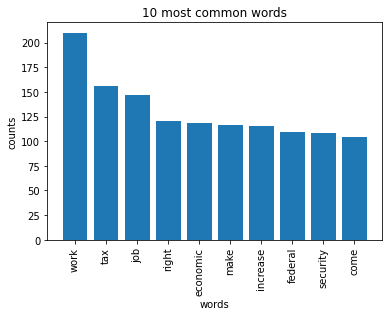

In [544]:
plot_10_most_common_words(count_data, count_vectorizer)

Introducing helper function for LDA 

In [545]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

Tweaking the two parameters below (use int values below 15)

In [546]:
number_topics = 2
number_words = 15

Creating and fitting the LDA model

In [547]:
lda = LDA(n_components=number_topics)
lda.fit(count_data)

LatentDirichletAllocation(n_components=2)

Printing the topics found by the LDA model

In [548]:
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
work tax federal job security economic health increase right force make care labor high freedom

Topic #1:
work job make right family business tax life home come economy increase economic free peace


### **Interpretation**

Topic 0 seemingly aligns with addresses by Republican presidents, who prioritize federal laws, price increase (inflation), strengthening security, etc. 

Topic 1, on the other hand, aligns with addresses by Democratic presidents, who prioritize  creating jobs, providing healthcare services, individual rights, etc. 

While 'tax' is common to both topics, it seems to have slightly higher priority among Republican presidents as  compared to Democratic presidents. 


### **4. Can you determine the sentiment of each state of the union using nltk's Vader module?**

Performing sentiment analysis on the cleaned speech.

In [549]:
analyzer=SentimentIntensityAnalyzer()
def polarity_score(text):
    if len(text)>0:
        score=analyzer.polarity_scores(text)['compound']
        return score
    else:
        return 0
words_df['polarityscore'] = words_df['cleanspeech'].apply(lambda text : polarity_score(text))

In [550]:
words_df['polarityscore']

0     0.9999
1     1.0000
2     0.9998
3     0.9999
4     0.9998
5     0.9996
6     0.9998
7     0.9995
8     0.9999
9     0.9999
10    0.5921
11    0.9998
12    0.9997
13    0.9999
Name: polarityscore, dtype: float64

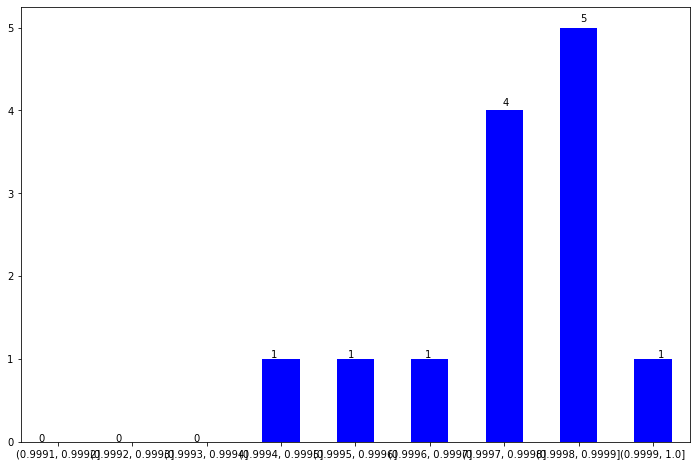

In [551]:
def sentianamolybarplot(df):
    polarity_scale=[0.9991,0.9992,0.9993,0.9994,0.9995,0.9996,0.9997,0.9998,0.9999,1]
    #'Review_polarity' is column name of sentiment score calculated for whole review.
    df2=df[(df['polarityscore']>0)]
    out = pd.cut(df2['polarityscore'],polarity_scale)
    ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(12,8))
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.040, p.get_height() * 1.015))
    plt.show()
sentianamolybarplot(words_df)

### **Interpretation**

In the State of Union Speeches, the presidents talk about important issues facing Americans and offers their ideas on solving the nation's problems, including suggestions for new laws and policies. As displayed in the plot, the polarity scores for 13 speeches (barring W. Bush) is positive. This is understandable as the State of Union speeches are a PR vehicle, leveraged to display the President's power and positive influence. 

The only speech with a negative score (-0.1417) was that of W.Bush that followed the 9/11 (2001) attack by militants on the United States. During his State of the Union address on January 29, 2002, President W Bush identified North Korea, Iran, and Iraq as representing significant threats to the United States. He said, "States like these and their terrorist allies constitute an axis of evil, arming to threaten the peace of the world". In this speech, he outlined the objectives for the War on Terror. 

### **5. Do speeches of different presidents cluster in any way that can allow you to determine their political party? How different are Biden and Trump according to this clustering?**

In [552]:
def remove_noise(text, stop_words = nltk.corpus.stopwords.words('english')):
    newsw = ['annual', 'number', 'help', 'thank', 'get', 'going', 'think', 'look', 'said', 'create', 'citizens', 'citizen', 'across', 'since', 'go', 'believe', 'say', 'long', 'better', 'plan', 'national', 'ask' '10', 'much', 'good', 'great', 'best', 'cannot', 'still', 'know', 'years', '1', 'major', 'want', 'able', 'put', 'capacity', 'programs', 'per', 'percent', 'million', 'act', 'provide', 'afford', 'needed', 'may', 'possible', 'full', '2', 'effort', 'meeting', 'address', 'ever', 'measures', 'ago', 'delivered', '5', 'program', 'past', 'future', 'need', 'needs', 'house', 'also', 'tonight', 'propose', 'toward', 'continue', 'society','country', 'seek', 'period', 'year', 'man', 'men', 'one', 'areas', 'begin', 'live', 'make', 'let', 'upon', 'well', 'office', 'meet', 'make' 'citizens', 'human', 'self', 'among', 'peoples', 'affairs', 'would', 'field', 'first', 'interest', 'today', 'recommendations', 'recomenndation', 'within', 'shall', 'administration', 'nation', 'nations', 'us', 'we', 'policy', 'legislation', 'time', 'new', 'many', 'several', 'few', 'government', 'world', 'people', 'united', 'states', 'system', 'every', 'people', 'must', '626','give', 'categories', '226762', '17608', '24532', '430', '38','statistics', 'analyses', 'miscellaneous', 'congressional', 'skip', 'content', 'documents', 'attributes', 'media', 'message', 'congress', 'state', 'union', 'america', 'american', 'americans', 'presidency', 'president', 'project', 'search', 'toggle', 'navigation', 'search', 'guidebook', 'archive', 'category', 'main', 'take','like','yet','j','000']
    stop_words = stop_words + newsw
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

TF-IDF (term frequency-inverse document frequency) is a measure in machine learning that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents. This method will allow us to analyze how close one president's speech is to the other.

In [553]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.8,
                                   max_features = 50,
                                   min_df = 0.1,
                                   tokenizer = remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(words_df['cleanspeech'].values)

In [554]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)
# display(cluster_centers)
# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    print('Cluster: {}'.format(i+1))
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms [:15])

Cluster: 1
['labor', 'inflation', 'foreign', 'balance', 'require', 'control', 'rate', 'soviet', 'step', 'spending', 'responsibility', 'international', 'present', 'nuclear', 'social']
Cluster: 2
['drug', 'pay', 'thing', 'lose', 'back', 'decade', 'something', 'month', 'fight', 'crime', 'clean', 'pas', 'hard', 'spending', 'value']


### **Interpretation**

On clustering the popular words in the speech, it seems like Cluster 1 aligns with speeches by Republican presidents and Cluster 2 with that of speeches by Democartic presidents. 

Converting the datafram into list for further analysis.

In [555]:
speech_list = []
for i in range(len(words_df)):
    speech_list.append(words_df.iloc[[i]]['cleanspeech'].item())

In [556]:
titles = []
for i in range(len(words_df)):
    titles.append(words_df.iloc[[i]]['name'].item())

In [557]:
texts = [txt.split() for txt in speech_list]

In [558]:
# Create an instance of a PorterStemmer object
porter = PorterStemmer()

# For each token of each text, we generated its stem 
texts_stem = [[porter.stem(token) for token in text] for text in texts]

In [559]:
# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each speech, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_stem]

In [560]:
# Generate the tf-idf model
model = TfidfModel(bows)

In [561]:
# Compute the similarity matrix (pairwise distance between all speeches)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a DataFrame
sim_df = pd.DataFrame(list(sims))

# Add the name of the presidents as columns and index of the DataFrame
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df

,Truman,Eisenhower,Kennedy,Johnson,Nixon,Ford,Carter,Reagan,Bush,Clinton,W. Bush,Obama,Trump,Biden
Truman,1.000000,0.317641,0.153883,0.114496,0.107819,0.108512,0.143325,0.123956,0.064340,0.069926,0.058453,0.107020,0.068102,0.058605
Eisenhower,0.317641,1.000000,0.194049,0.142451,0.131300,0.142953,0.162902,0.146123,0.085829,0.089543,0.075407,0.113263,0.076914,0.073155
Kennedy,0.153883,0.194049,1.000000,0.168827,0.114879,0.125111,0.119554,0.123728,0.098707,0.093087,0.076403,0.112027,0.070144,0.076947
Johnson,0.114496,0.142451,0.168827,1.000000,0.178604,0.071082,0.122626,0.108820,0.121250,0.087429,0.063937,0.115238,0.095459,0.079675
Nixon,0.107819,0.131300,0.114879,0.178604,1.000000,0.088217,0.114659,0.114501,0.087131,0.098802,0.060760,0.121817,0.071916,0.065563
Ford,0.108512,0.142953,0.125111,0.071082,0.088217,1.000000,0.137203,0.154592,0.060200,0.074718,0.061282,0.103304,0.051787,0.067191
Carter,0.143325,0.162902,0.119554,0.122626,0.114659,0.137203,1.000000,0.157718,0.088272,0.122366,0.071351,0.124520,0.088867,0.075087
Reagan,0.123956,0.146123,0.123728,0.108820,0.114501,0.154592,0.157718,1.000000,0.095627,0.109869,0.085279,0.130934,0.109803,0.081094
Bush,0.064340,0.085829,0.098707,0.121250,0.087131,0.060200,0.088272,0.095627,1.000000,0.168871,0.071574,0.145225,0.105494,0.096121
Clinton,0.069926,0.089543,0.093087,0.087429,0.098802,0.074718,0.122366,0.109869,0.168871,1.000000,0.111602,0.225723,0.140355,0.180811


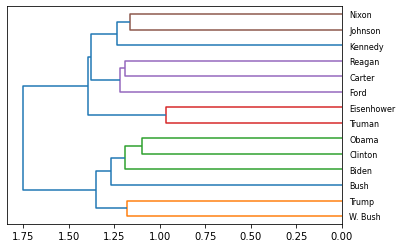

In [562]:
# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
a = hierarchy.dendrogram(Z,  leaf_font_size=8, labels=sim_df.index,  orientation="left")

### **Interpretation**

In the dendogram above,  the presidents don't seem to be clustered based on their affiliation with political parties. Presidents who served one after the other, on the other hand, appear to be grouped together in most cases (brown, lavender, red), implying that the problems that dominated their speeches were persistent concerns throughout those respective decades.

Brown : Addresses by Johnson (1965; Democrat) and Nixon (1970; Republican) were most similar to each other. This was the period when the United States was involved in the Vietnam War (1961 to 1975). Both presidents seemed to emphasize on building and strengthening the economy.

Lavender : Addresses by Ford (1975; Republican), Carter (1978; Democrat) and Reagan (1982; Republican) were similar to each other. "Tax" was a dominant topic during their presidency as they introduced reforms to account for the federal deficits.

Red : Addresses by Truman (1947; Democrat) and Eisenhower (1953; Republican) were  similar to each other. Both of them mentioned the need to strengthen labour management practices, holding individuals/corporations accountable for corruption, racketeering and abuse of trust and power. 

Green : Addresses by Obama (2010; Democrat), Clinton (1994; Democrat) and Biden (2022; Democrat) were similar to each other. They prioritised "Healthcare" reforms in their speeches. 

Orange : Addresses by Trump(2018; Republican) and W.Bush (2002; Republican) were  similar to each other.


Biden and Trump are categorized in different clusters but their speeches' seem to be associated with that of Bush. The similarity score for their respective addresses is 0.134.   

Overall, there seem to be two sets of addresses that are similar and clustered together - those of presidents from 1947 to 1982 (Nixon, Johnson, Kennedy, Reagan, Carter, Ford, Eisenhower, Truman) and of presidents from 1990 to 2022 (Obama, Clinton, Biden, Bush, Trump, W.Bush). Perhaps, over time, the language that was used in these State of Union speeches has evolved. 

### **6. Who was the president whose speech was the most similar to the speech of Biden in 2022?**

Text(0.5, 1.0, "Most similar speech to Biden's")

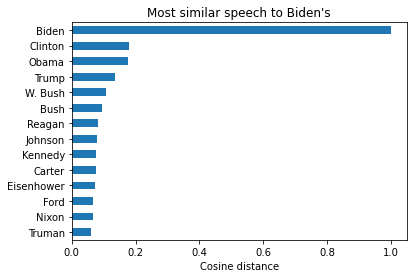

In [563]:
# This is needed to display plots in a notebook
%matplotlib inline

# Select the column corresponding to Biden's address and 
v = sim_df["Biden"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar speech to Biden's")

### **Interpretation**

Biden's address is most similar to that of Clinton's, follwed by Obama's. This could be the case because of their emphasis on 'healthcare reforms' and 'creation of jobs' in their respective speeches.  

Text(0.5, 1.0, "Most similar speech to Trump's'")

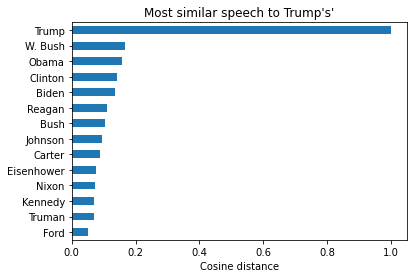

In [564]:
%matplotlib inline

# Select the column corresponding to Trump's address and 
v = sim_df["Trump"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar speech to Trump's'")

### **Interpretation**

Trump's address is most similar to that of W Bush's, follwed by Obama's. This could be the case because of their emphasis on 'creation of jobs' in their respective speeches.  

### **7. Develop and algorithm that can allow you to determine if the speech was given by a Democrat or by a republican.**

**Approach I - Using the complete speech in the algorithm**

Appending a column with the president's political party to the dataframe

In [565]:
politicalpartylist = ['Democrat', 'Republican', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Democrat', 'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Democrat']
words_df["PoliticalParty"] = politicalpartylist
print(words_df)

          name                                             speech  \
0       Truman  presidents presidential 227045 correspondents ...   
1   Eisenhower  presidents presidential 227045 correspondents ...   
2      Kennedy  presidents presidential 227045 correspondents ...   
3      Johnson  presidents presidential 227045 correspondents ...   
4        Nixon  presidents presidential 227045 correspondents ...   
5         Ford  presidents presidential 227045 correspondents ...   
6       Carter  joint session presidents presidential 227045 c...   
7       Reagan  presidents presidential 227045 correspondents ...   
8         Bush  joint session presidents presidential 227045 c...   
9      Clinton  joint session presidents presidential 227045 c...   
10     W. Bush  joint session presidents presidential 227045 c...   
11       Obama  joint session presidents presidential 227045 c...   
12       Trump  joint session presidents presidential 227045 c...   
13       Biden  joint session pres

Creating target

In [566]:
y = words_df.PoliticalParty

Splitting training and testing data

In [567]:
X_train, X_test, y_train, y_test = train_test_split(words_df['cleanspeech'], y, test_size=0.33, 
                 random_state=53)

Initializing count vectorizer

In [568]:
count_vectorizer = CountVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

Creating count train and test variables

In [569]:
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

Initializing tfidf vectorizer

In [570]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

Creating tfidf train and test variables

In [571]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [572]:
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)
count_nb_pred = count_nb.predict(count_test)
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.4
NaiveBayes Count Score:  0.4


In [573]:
tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

LinearSVC Score:   0.400


Upon changing the text for republican_speech and democrat_speech, the algorithm predicts which party the new speech is closely associated to

In [574]:
republican_speech = "cut federal spending"
democrat_speech = "Affordable Health Care"

republican_speech_vectorized = tfidf_vectorizer.transform([republican_speech])
democrat_speech_vectorized = tfidf_vectorizer.transform([democrat_speech])

republican_speech_pred = tfidf_svc.predict(republican_speech_vectorized)
democrat_speech_pred = tfidf_svc.predict(democrat_speech_vectorized)

print("Predicted Republican Speech", republican_speech_pred)
print("Predicted Democrat Speech", democrat_speech_pred)

Predicted Republican Speech ['Republican']
Predicted Democrat Speech ['Democrat']


Since the sample size is small, we may replace the entire speech with tri-grams of all the speeches.

**Approach II - Using the trigrams in the algorithm**

This will resolve the issue of small sample size and would be a better approach than the first one given above. 

Creating a new dataframe with all the trigrams and adding a new column with political parties.

In [575]:
trigrams_truman_df = pd.DataFrame(dict_trigrams_truman)
trigrams_truman_df['political_party'] = 'Democrat'

trigrams_eisenhower_df = pd.DataFrame(dict_trigrams_eisenhower)
trigrams_eisenhower_df['political_party'] = 'Republican'

trigrams_kennedy_df = pd.DataFrame(dict_trigrams_kennedy)
trigrams_kennedy_df['political_party'] = 'Democrat'

trigrams_johnson_df = pd.DataFrame(dict_trigrams_johnson)
trigrams_johnson_df['political_party'] = 'Democrat'

trigrams_nixon_df = pd.DataFrame(dict_trigrams_nixon)
trigrams_nixon_df['political_party'] = 'Republican'

trigrams_ford_df = pd.DataFrame(dict_trigrams_ford)
trigrams_ford_df['political_party'] = 'Republican'

trigrams_carter_df = pd.DataFrame(dict_trigrams_carter)
trigrams_carter_df['political_party'] = 'Democrat'

trigrams_reagan_df = pd.DataFrame(dict_trigrams_reagan)
trigrams_reagan_df['political_party'] = 'Republican'

trigrams_bush_df = pd.DataFrame(dict_trigrams_bush)
trigrams_bush_df['political_party'] = 'Republican'

trigrams_clinton_df = pd.DataFrame(dict_trigrams_clinton)
trigrams_clinton_df['political_party'] = 'Democrat'

trigrams_wbush_df = pd.DataFrame(dict_trigrams_wbush)
trigrams_wbush_df['political_party'] = 'Republican'

trigrams_obama_df = pd.DataFrame(dict_trigrams_obama)
trigrams_obama_df['political_party'] = 'Democrat'

trigrams_trump_df = pd.DataFrame(dict_trigrams_trump)
trigrams_trump_df['political_party'] = 'Republican'

trigrams_biden_df = pd.DataFrame(dict_trigrams_biden)
trigrams_biden_df['political_party'] = 'Democrat'

trigram_list = [trigrams_truman_df, trigrams_eisenhower_df, trigrams_kennedy_df, trigrams_johnson_df, trigrams_nixon_df, trigrams_ford_df, trigrams_carter_df, trigrams_reagan_df, trigrams_bush_df, trigrams_clinton_df, trigrams_wbush_df, trigrams_obama_df, trigrams_trump_df, trigrams_biden_df]
trigrams_all_df = pd.concat(trigram_list)
trigrams_all_df.rename(columns={0: 'trigrams', 1: 'freq'}, inplace=True)

To further prepare the dataframe to fit the model, we need to duplicate all the words based on the frequency column and then drop the frequency column.

In [576]:
trigrams_all_df_simplified = trigrams_all_df.loc[trigrams_all_df.index.repeat(trigrams_all_df.freq)]
trigrams_all_df_simplified = trigrams_all_df_simplified.drop(['freq'],axis=1)
len(trigrams_all_df_simplified)

390300

Split the data into test and train data

In [577]:
data_features = trigrams_all_df_simplified['trigrams']
data_target = trigrams_all_df_simplified['political_party']

x_train2, x_test2, y_train2, y_test2 = train_test_split(data_features,
                                                    data_target,
                                                    test_size = 0.2,
                                                    random_state = 100)

Fit the data to count_vectorizer and tfidf model

In [578]:
# Initializing count vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Creating count train and test variables
count_train2 = count_vectorizer.fit_transform(x_train2)
count_test2 = count_vectorizer.transform(x_test2)

# Initializing tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Creating tfidf train and test variables
tfidf_train2 = tfidf_vectorizer.fit_transform(x_train2)
tfidf_test2 = tfidf_vectorizer.transform(x_test2)

Print the accuracy score for all models

In [579]:
tfidf_nb2 = MultinomialNB()
tfidf_nb2.fit(tfidf_train2, y_train2)
tfidf_nb_pred2 = tfidf_nb2.predict(tfidf_test2)
tfidf_nb_score2 = metrics.accuracy_score(y_test2, tfidf_nb_pred2)

count_nb2 = MultinomialNB()
count_nb2.fit(count_train2, y_train2)
count_nb_pred2 = count_nb2.predict(count_test2)
count_nb_score2 = metrics.accuracy_score(y_test2, count_nb_pred2)

tfidf_svc2 = LinearSVC()
tfidf_svc2.fit(tfidf_train2, y_train2)
tfidf_svc_pred2 = tfidf_svc2.predict(tfidf_test2)
tfidf_svc_score2 = metrics.accuracy_score(y_test2, tfidf_svc_pred2)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score2)
print('NaiveBayes Count Score: ', count_nb_score2)
print("LinearSVC Score:   %0.3f" % tfidf_svc_score2)

NaiveBayes Tfidf Score:  0.8208429413271843
NaiveBayes Count Score:  0.8194850115295926
LinearSVC Score:   0.842


Test the model with the highest accuracy score with new data.

In [580]:
republican_text = "bring tax reform"
democrat_text = "health care system"

republican_speech_vectorized = tfidf_vectorizer.transform([republican_text])
democrat_speech_vectorized = tfidf_vectorizer.transform([democrat_text])

republican_speech_pred = tfidf_svc2.predict(republican_speech_vectorized)
democrat_speech_pred = tfidf_svc2.predict(democrat_speech_vectorized)

print("Predicted Republican Speech", republican_speech_pred)
print("Predicted Democrat Speech", democrat_speech_pred)

Predicted Republican Speech ['Republican']
Predicted Democrat Speech ['Democrat']
